In [1]:
# 라이브러리, 데이터
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import shap
from sklearn.calibration import LabelEncoder
import numpy as np
from sklearn.model_selection import learning_curve

sns_df = pd.read_csv("./Social_Network_Ads.csv")

shap.initjs()

### 데이터 개요

In [2]:
sns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
# user id 열 버리기
sns_df.drop("User ID", axis=1, inplace=True)
sns_df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


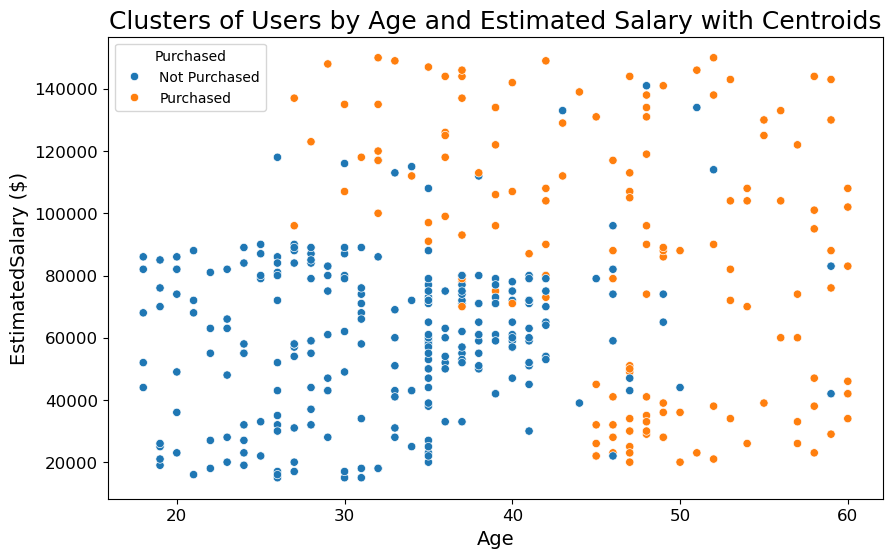

In [51]:
# 클러스터링 시각화
plt.figure(figsize=(10, 6))

# sns_df['Purchased'] = sns_df['Purchased'].map({0: 'Not Purchased', 1: 'Purchased'}) # 0, 1 매핑

# 산점도 그리기
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased", data=sns_df)

plt.title("Clusters of Users by Age and Estimated Salary with Centroids", fontsize=18)
plt.xlabel("Age", fontsize=14)
plt.ylabel("EstimatedSalary ($)", fontsize=14)
plt.xticks(fontsize=12)  # x축 눈금 글자 크기
plt.yticks(fontsize=12)  # y축 눈금 글자 크기
# plt.legend(labels=['Not Purchased', 'Purchased'])
plt.show()

In [5]:
# # 나이와 소득의 이상치 찾기
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# sns.boxplot(sns_df['Age'])
# plt.title('Boxplot of Age')

# plt.subplot(1, 2, 2)
# sns.boxplot(sns_df['EstimatedSalary'])
# plt.title('Boxplot of EstimatedSalary')

# plt.show()

# # Identify outliers in 'Age' and 'EstimatedSalary'
# Q1_age = sns_df['Age'].quantile(0.25)
# Q3_age = sns_df['Age'].quantile(0.75)
# IQR_age = Q3_age - Q1_age
# age_outliers = sns_df[(sns_df['Age'] < Q1_age - 1.5 * IQR_age) | (sns_df['Age'] > Q3_age + 1.5 * IQR_age)]

# Q1_salary = sns_df['EstimatedSalary'].quantile(0.25)
# Q3_salary = sns_df['EstimatedSalary'].quantile(0.75)
# IQR_salary = Q3_salary - Q1_salary
# salary_outliers = sns_df[(sns_df['EstimatedSalary'] < Q1_salary - 1.5 * IQR_salary) | (sns_df['EstimatedSalary'] > Q3_salary + 1.5 * IQR_salary)]

# len(age_outliers), len(salary_outliers)

### 나이와 소득 수준으로 클러스터링

In [6]:
# feature 선택
features = sns_df[["Age", "EstimatedSalary"]]

# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
# # 이상적인 클러스터 수 찾기
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=12345)
#     kmeans.fit(scaled_features)
#     wcss.append(kmeans.inertia_) # 최적의 클러스터 수 계산

In [8]:
# wcss

In [9]:
# # elbow curve
# # 그래프가 에서 기울기의 변화가 가장 큰 점이 적정 클러스터이다.
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), wcss, marker='o')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

In [10]:
# # 실루엣 스코어 보기
# silhouette_scores = {}
# for k in range(2, 11):  # KMeans는 최소 2개의 클러스터가 필요하므로 k=2부터 시작
#     kmeans = KMeans(n_clusters=k, init='k-means++', random_state=12345)
#     clusters = kmeans.fit_predict(scaled_features)
#     sil_score = silhouette_score(scaled_features, clusters)
#     silhouette_scores[k] = sil_score

In [11]:
# for k, score in silhouette_scores.items():
#     print(f'k={k}: Silhouette Score = {score:.4f}')

In [12]:
# # 실루엣 스코어를 보니 7이 알맞아 보임.
# optimal_clusters = 7
# kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=12345)
# clusters = kmeans.fit_predict(scaled_features)

# # Add the cluster labels to the original data
# sns_df['Cluster'] = clusters

In [13]:
# # Show cluster centers
# centers = kmeans.cluster_centers_
# centers = scaler.inverse_transform(centers)
# centers

In [14]:
# # 클러스터링 시각화
# plt.figure(figsize=(10, 6))

# # 산점도 그리기
# sns.scatterplot(x='Age', y='EstimatedSalary', hue=clusters, data=sns_df, palette='viridis', s=100, style=clusters , markers=['X']*optimal_clusters,)

# # 클러스터 중심 따로 그리기
# centers = kmeans.cluster_centers_  # 표준화 되어있는 상태이다.
# centers = scaler.inverse_transform(centers)  # 표준화 해제

# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, marker='X', label='Centroids')
# plt.title('Clusters of Users by Age and Estimated Salary with Centroids')
# plt.xlabel('Age')
# plt.ylabel('EstimatedSalary')
# plt.legend("")
# plt.show()

In [15]:
# # 각 데이터 포인트에 할당된 클러스터 라벨 확인
# labels = kmeans.labels_
# print("Cluster labels for each point:", labels)

### 결제 여부로 분류 모델도 만들어 보기.

In [16]:
le = LabelEncoder()
sns_df["Gender"] = le.fit_transform(sns_df["Gender"])

In [17]:
features = ["Age", "EstimatedSalary"]

X = sns_df[features]
y = sns_df["Purchased"]

In [18]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [19]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=12345),
    "Decision Tree": DecisionTreeClassifier(random_state=12345),
    "Random Forest": RandomForestClassifier(random_state=12345),
    "SVM": SVC(random_state=12345),
    "KNN": KNeighborsClassifier(),
    "AB": AdaBoostClassifier(random_state=12345),
}

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=False)

# Dictionary to hold the accuracy scores
model_scores = {model_name: [] for model_name in models.keys()}

# Perform cross-validation for each model
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_scores[model_name].append(accuracy)

# Print the accuracy for each fold and the average accuracy for each model
for model_name, scores in model_scores.items():
    print(f"{model_name}:")
    for i, score in enumerate(scores, 1):
        print(f"  Fold {i} Accuracy: {score:.2%}")
    print(f"  Average Accuracy: {sum(scores) / len(scores):.2%}\n")

Logistic Regression:
  Fold 1 Accuracy: 65.00%
  Fold 2 Accuracy: 65.00%
  Fold 3 Accuracy: 63.75%
  Fold 4 Accuracy: 81.25%
  Fold 5 Accuracy: 62.50%
  Average Accuracy: 67.50%

Decision Tree:
  Fold 1 Accuracy: 75.00%
  Fold 2 Accuracy: 90.00%
  Fold 3 Accuracy: 82.50%
  Fold 4 Accuracy: 77.50%
  Fold 5 Accuracy: 77.50%
  Average Accuracy: 80.50%

Random Forest:
  Fold 1 Accuracy: 80.00%
  Fold 2 Accuracy: 93.75%
  Fold 3 Accuracy: 91.25%
  Fold 4 Accuracy: 81.25%
  Fold 5 Accuracy: 82.50%
  Average Accuracy: 85.75%

SVM:
  Fold 1 Accuracy: 81.25%
  Fold 2 Accuracy: 86.25%
  Fold 3 Accuracy: 73.75%
  Fold 4 Accuracy: 81.25%
  Fold 5 Accuracy: 63.75%
  Average Accuracy: 77.25%

KNN:
  Fold 1 Accuracy: 81.25%
  Fold 2 Accuracy: 86.25%
  Fold 3 Accuracy: 72.50%
  Fold 4 Accuracy: 76.25%
  Fold 5 Accuracy: 67.50%
  Average Accuracy: 76.75%

AB:
  Fold 1 Accuracy: 72.50%
  Fold 2 Accuracy: 93.75%
  Fold 3 Accuracy: 86.25%
  Fold 4 Accuracy: 81.25%
  Fold 5 Accuracy: 85.00%
  Average Accur

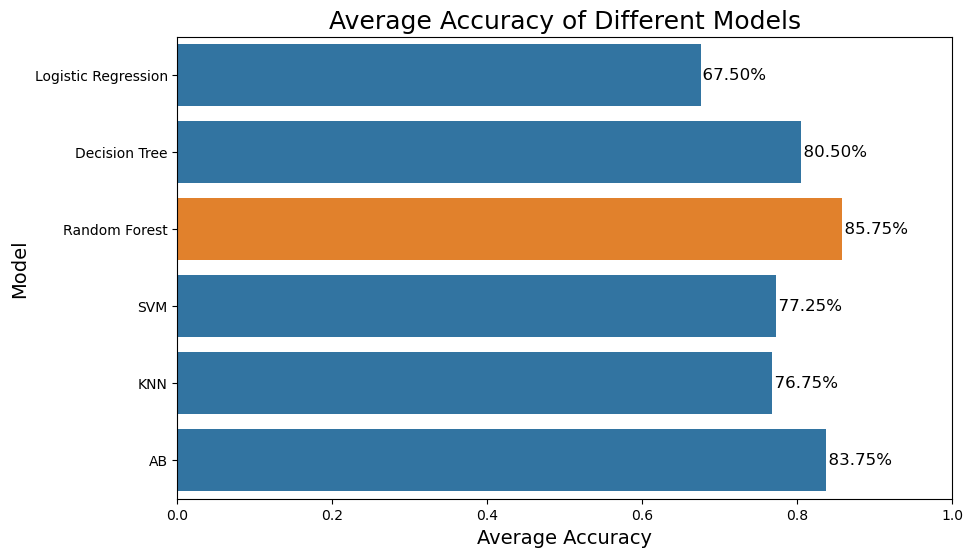

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average accuracy for each model
average_scores = {
    model_name: sum(scores) / len(scores) for model_name, scores in model_scores.items()
}

# Convert to a pandas DataFrame for easier plotting
scores_df = pd.DataFrame(
    list(average_scores.items()), columns=["Model", "Average Accuracy"]
)

scores_df["Is Random Forest"] = scores_df["Model"] == "Random Forest"


# Plotting the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Average Accuracy", y="Model", data=scores_df, hue="Is Random Forest"
)

for index, value in enumerate(scores_df["Average Accuracy"]):
    ax.text(
        value + 0.01,
        index,
        f"          {value * 100:.2f}%",
        color="black",
        ha="center",
        va="center",
        fontsize=12,
    )

plt.title("Average Accuracy of Different Models", fontsize=18)
plt.xlabel("Average Accuracy", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.xlim(0, 1)  # Accuracy is between 0 and 1
plt.legend().remove()
plt.show()

In [21]:
# randomforestclassifier가 가장 정확도가 높으므로 선택.

rfc = RandomForestClassifier(random_state=12345)
scaled_features = scaler.fit_transform(sns_df[features])

X = scaled_features

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

In [43]:
y_train.value_counts()

Purchased
0    213
1    107
Name: count, dtype: int64

In [23]:
param_grid = {"n_estimators": [100, 200, 300, 400], "min_samples_leaf": [1, 2, 4]}

# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rfc, param_grid=param_grid, cv=5, refit=True, return_train_score=True
)
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 최적의 스코어 출력
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df[
    [
        "params",
        "mean_test_score",
        "rank_test_score",
        "split0_test_score",
        "split1_test_score",
        "split2_test_score",
        "split3_test_score",
        "split4_test_score",
    ]
].sort_values("rank_test_score")

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
9,"{'min_samples_leaf': 4, 'n_estimators': 200}",0.918750,1,0.921875,0.937500,0.921875,0.906250,0.906250
10,"{'min_samples_leaf': 4, 'n_estimators': 300}",0.918750,1,0.921875,0.937500,0.921875,0.906250,0.906250
11,"{'min_samples_leaf': 4, 'n_estimators': 400}",0.918750,1,0.921875,0.937500,0.921875,0.906250,0.906250
8,"{'min_samples_leaf': 4, 'n_estimators': 100}",0.909375,4,0.875000,0.937500,0.921875,0.906250,0.906250
7,"{'min_samples_leaf': 2, 'n_estimators': 400}",0.903125,5,0.859375,0.937500,0.921875,0.906250,0.890625
4,"{'min_samples_leaf': 2, 'n_estimators': 100}",0.900000,6,0.859375,0.921875,0.921875,0.906250,0.890625
5,"{'min_samples_leaf': 2, 'n_estimators': 200}",0.900000,6,0.859375,0.921875,0.921875,0.906250,0.890625
6,"{'min_samples_leaf': 2, 'n_estimators': 300}",0.900000,6,0.859375,0.921875,0.921875,0.906250,0.890625
0,"{'min_samples_leaf': 1, 'n_estimators': 100}",0.884375,9,0.828125,0.906250,0.890625,0.921875,0.875000
2,"{'min_samples_leaf': 1, 'n_estimators': 300}",0.884375,9,0.843750,0.906250,0.890625,0.906250,0.875000


In [24]:
y_pred = grid_search.predict(X_test)

In [25]:
grid_search.score(X_train, y_train)

0.940625

In [26]:
accuracy_score(y_pred, y_test)

0.875

In [27]:
cm = metrics.confusion_matrix(y_test, y_pred)

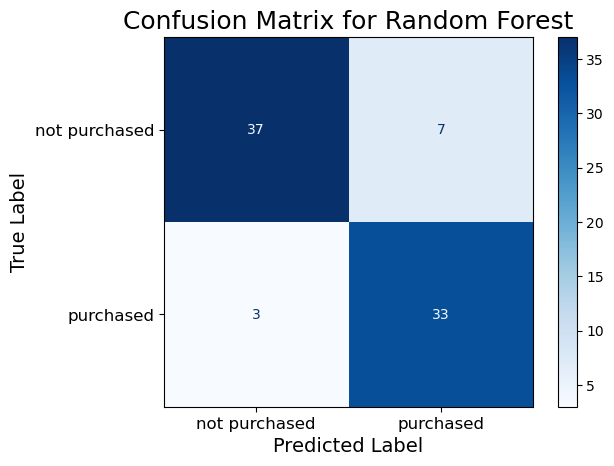

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Random Forest", fontsize=18)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(
    ticks=[0, 1], labels=["not purchased", "purchased"], fontsize=12
)  # x축 눈금 글자 크기
plt.yticks(
    ticks=[0, 1], labels=["not purchased", "purchased"], fontsize=12
)  # y축 눈금 글자 크기
plt.show()

In [29]:
y_scores = grid_search.predict_proba(X_test)[:, 1]

In [30]:
from sklearn.metrics import roc_auc_score

# AUC 값 계산
auc_value = roc_auc_score(y_test, y_scores)

auc_value

0.928030303030303

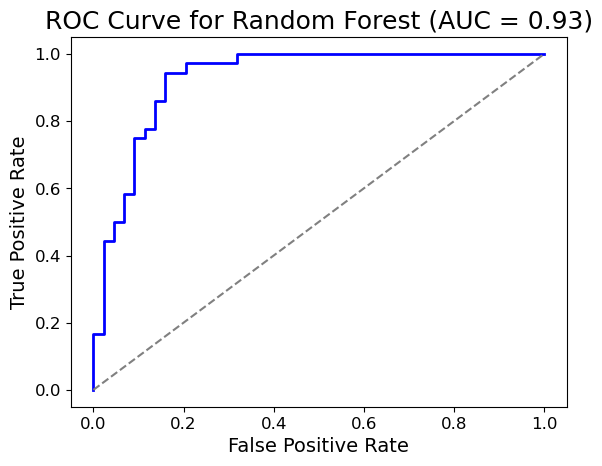

In [31]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# ROC 곡선 계산
fpr, tpr, _ = roc_curve(y_test, y_scores)

# ROC 곡선 그리기
# roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
# roc_disp.plot()
plt.plot(fpr, tpr, color="blue", lw=2)
plt.title(f"ROC Curve for Random Forest (AUC = {auc_value:.2f})", fontsize=18)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.xticks(fontsize=12)  # x축 눈금 글자 크기
plt.yticks(fontsize=12)  # y축 눈금 글자 크기
plt.show()

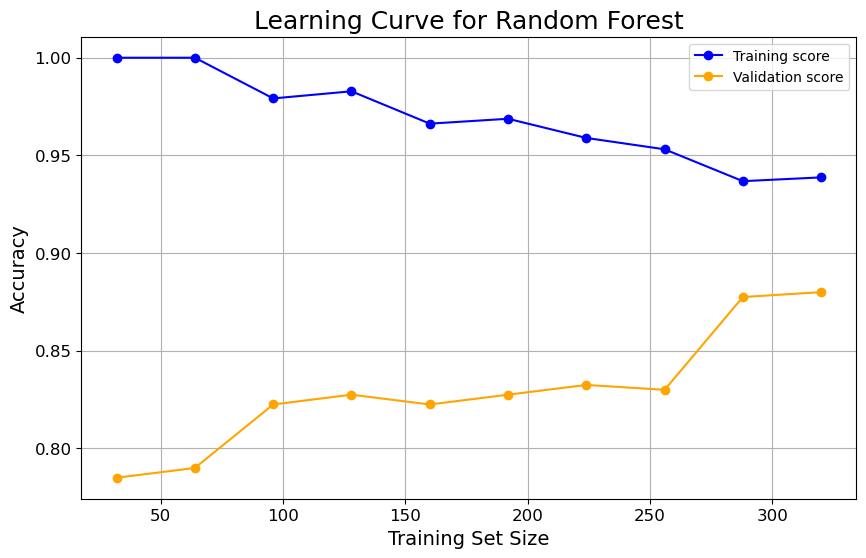

In [32]:
# 학습 곡선 계산
train_sizes, train_scores, test_scores = learning_curve(
    grid_search,
    X,
    y,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=12345,
)

# 평균 및 표준편차 계산
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 학습 곡선 그리기
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training score")
plt.plot(train_sizes, test_mean, "o-", color="orange", label="Validation score")

# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.1)

plt.title("Learning Curve for Random Forest", fontsize=18)
plt.xlabel("Training Set Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(fontsize=12)  # x축 눈금 글자 크기
plt.yticks(fontsize=12)  # y축 눈금 글자 크기
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [33]:
explainer = shap.KernelExplainer(grid_search.predict, X_test)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/80 [00:00<?, ?it/s]

In [34]:
print(shap_values)

[[-0.29375 -0.20625]
 [-0.325   -0.175  ]
 [ 0.58125 -0.08125]
 [-0.2625  -0.2375 ]
 [-0.25625 -0.24375]
 [ 0.6125  -0.1125 ]
 [ 0.40625  0.09375]
 [ 0.58125 -0.08125]
 [-0.2625  -0.2375 ]
 [-0.29375 -0.20625]
 [-0.2625  -0.2375 ]
 [-0.29375 -0.20625]
 [ 0.25     0.25   ]
 [-0.375   -0.125  ]
 [-0.11875  0.61875]
 [-0.25625 -0.24375]
 [-0.25625 -0.24375]
 [-0.28125 -0.21875]
 [-0.14375  0.64375]
 [ 0.58125 -0.08125]
 [-0.29375 -0.20625]
 [-0.3125  -0.1875 ]
 [-0.29375 -0.20625]
 [-0.11875  0.61875]
 [ 0.58125 -0.08125]
 [ 0.40625  0.09375]
 [-0.25    -0.25   ]
 [-0.28125 -0.21875]
 [ 0.025    0.475  ]
 [-0.25    -0.25   ]
 [-0.325   -0.175  ]
 [ 0.58125 -0.08125]
 [ 0.6125  -0.1125 ]
 [-0.29375 -0.20625]
 [-0.3125  -0.1875 ]
 [-0.2875  -0.2125 ]
 [-0.125    0.625  ]
 [ 0.40625  0.09375]
 [-0.3125  -0.1875 ]
 [-0.1125   0.6125 ]
 [-0.05     0.55   ]
 [-0.325   -0.175  ]
 [-0.29375 -0.20625]
 [ 0.31875  0.18125]
 [-0.29375 -0.20625]
 [ 0.6125  -0.1125 ]
 [ 0.25     0.25   ]
 [ 0.025    0

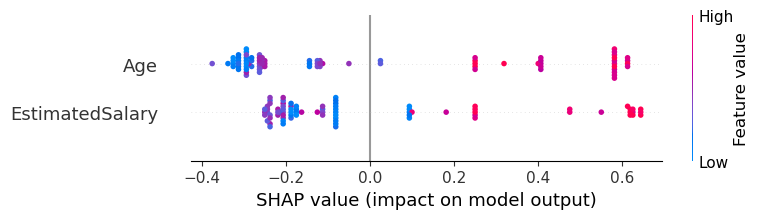

In [35]:
# SHAP summary plot (전체 특징 중요도)
shap.summary_plot(shap_values, X_test, feature_names=features)

In [36]:
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [37]:
X_test

array([[ 0.31949142,  0.50676401],
       [-1.39974491, -1.22576253],
       [ 1.27462271, -1.37258681],
       [-0.25358736, -0.34481683],
       [ 0.12846516,  0.03692631],
       [ 0.98808332,  0.12502088],
       [ 0.60603081, -0.9027491 ],
       [ 0.98808332, -1.07893824],
       [ 0.31949142,  0.30121002],
       [-1.39974491, -0.19799255],
       [-0.25358736,  0.15438573],
       [-0.25358736, -1.25512738],
       [ 0.98808332,  1.7988177 ],
       [-0.25358736,  0.62422344],
       [ 0.12846516,  1.88691227],
       [ 0.22397829, -0.37418169],
       [-0.0625611 , -0.4329114 ],
       [-0.73115301, -0.2273574 ],
       [-0.73115301,  1.91627713],
       [ 2.03872775, -1.19639767],
       [-1.30423178, -0.4329114 ],
       [-0.82666613, -0.78528968],
       [-1.11320552, -0.52100597],
       [ 0.12846516,  1.88691227],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.1083031 ],
       [ 0.41500455,  0.00756145],
       [-0.82666613,  0.38930459],
       [-0.44461362,

In [38]:
y_test

378    1
175    0
396    1
213    0
110    0
      ..
391    1
246    0
354    1
358    1
256    0
Name: Purchased, Length: 80, dtype: int64